<a href="https://colab.research.google.com/github/Mohit-Jangid/Pandas/blob/main/Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iris:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F19%2F420%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T141927Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D98f56318acf2461746015d26cced39cce02d98a061a063a92fe00e6aef890349ad39a7973f843b47e04bc570f7bbb4b20efba0b8d996817aecc7d461b3ac93a30aa3c3938575abead2c67bf4e2a8aeee4275bc8d233684793f579496a9a61c6c58ded45d06fd958770782a75628debbfe2faf6182fbdd8fa8ea16c715e4ea5cbab05c11b5a7fd1c41cc8a30955b815eac342574266f3e6f30ad4aedd76fc47f04e74cf294ffbc4bdb6449cc0d2610d96b1c100e969cd086c3aff40c6909a86e522eee02dfecf6823c4d2f02c68a33ebb231a6b02e57e8e0c4851071b28b527371ed28b9a432a07774724ac28b89b23ca434f217838ab932f8d397a1283e62e3d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3687 bytes downloaded
Downloaded and uncompressed: iris
Data source import complete.


<div style="color:white;background-color:Black;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Pandas toolkit Part 2</div>

<center>
<img src="https://i1.wp.com/www.datascienceexamples.com/wp-content/uploads/2019/10/python-and-pandas.jpg?resize=800%2C286&ssl=1" width=1200>
</center>

In [2]:
import pandas as pd
import numpy as np

In [3]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    2
2    5
3    3
4    0
5    3
6    4
7    4
8    6
9    2
dtype: int64

In [4]:
s.value_counts()

4    3
2    2
3    2
5    1
0    1
6    1
Name: count, dtype: int64

In [5]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [6]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.498234,-0.267170,1.592774,-0.159976
1,-1.320740,-0.046027,0.731459,0.754111
2,-1.275569,-1.355740,1.869782,0.555803
3,0.438961,0.016127,0.395181,-0.406740
4,0.915656,-1.669297,0.607884,-2.258525
5,-0.789828,-0.976608,-0.388807,0.138138
6,-0.005230,-0.709325,-1.187578,2.826558
7,2.092130,0.460362,-0.974075,-1.010996
8,-0.404893,0.121527,-0.817764,-0.896621
9,-0.109466,-2.747400,-0.172748,-0.645481


In [7]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.498234,-0.267170,1.592774,-0.159976
1,-1.320740,-0.046027,0.731459,0.754111
2,-1.275569,-1.355740,1.869782,0.555803
3,0.438961,0.016127,0.395181,-0.406740
4,0.915656,-1.669297,0.607884,-2.258525
5,-0.789828,-0.976608,-0.388807,0.138138
6,-0.005230,-0.709325,-1.187578,2.826558
7,2.092130,0.460362,-0.974075,-1.010996
8,-0.404893,0.121527,-0.817764,-0.896621
9,-0.109466,-2.747400,-0.172748,-0.645481


In [8]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [9]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [10]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [13]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [14]:
df = pd.DataFrame({

"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
"B": ["one", "one", "two", "three", "two", "two", "one", "three"],
"C": np.random.randn(8),
"D": np.random.randn(8)

     })
df

,A,B,C,D
0,foo,one,-1.748566,-1.044146
1,bar,one,1.402078,-0.231325
2,foo,two,0.759969,-1.273662
3,bar,three,-0.797558,-1.355913
4,foo,two,-0.535839,-0.280499
5,bar,two,-0.073194,0.036286
6,foo,one,-0.149530,-1.280390
7,foo,three,-0.067590,0.284481


In [15]:
df.groupby("A").sum()

,B,C,D
A,,,
bar,onethreetwo,0.531325,-1.550953
foo,onetwotwoonethree,-1.741556,-3.594216


In [16]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.402078 -0.231325
    three -0.797558 -1.355913
    two   -0.073194  0.036286
foo one   -1.898096 -2.324536
    three -0.067590  0.284481
    two    0.224130 -1.554161

In [17]:
tuples = list(zip(*[
["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
["one", "two", "one", "two", "one", "two", "one", "two"]
]))

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.031025 -0.109239
      two    -0.063837 -0.216615
baz   one     0.425802 -0.410027
      two    -0.498116 -0.094584

In [18]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.031025
               B   -0.109239
       two     A   -0.063837
               B   -0.216615
baz    one     A    0.425802
               B   -0.410027
       two     A   -0.498116
               B   -0.094584
dtype: float64

In [19]:
stacked.unstack()

A         B
first second                    
bar   one    -0.031025 -0.109239
      two    -0.063837 -0.216615
baz   one     0.425802 -0.410027
      two    -0.498116 -0.094584

In [20]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.031025 -0.063837
      B -0.109239 -0.216615
baz   A  0.425802 -0.498116
      B -0.410027 -0.094584

In [21]:
df = pd.DataFrame({

"A": ["one", "one", "two", "three"] * 3,
"B": ["A", "B", "C"] * 4,
"C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
"D": np.random.randn(12),
"E": np.random.randn(12)

})
df

,A,B,C,D,E
0,one,A,foo,1.727569,1.370682
1,one,B,foo,0.148310,0.172439
2,two,C,foo,1.319181,-0.049718
3,three,A,bar,1.976929,-0.772765
4,one,B,bar,-0.997677,-1.079769
5,one,C,bar,1.251078,-0.134749
6,two,A,foo,-0.946082,0.296332
7,three,B,foo,-0.383006,0.816780
8,one,C,foo,0.926302,2.119242
9,one,A,bar,-3.218076,-0.277609


In [22]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -3.218076  1.727569
      B -0.997677  0.148310
      C  1.251078  0.926302
three A  1.976929       NaN
      B       NaN -0.383006
      C  0.146560       NaN
two   A       NaN -0.946082
      B  2.092671       NaN
      C       NaN  1.319181

In [23]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    24660
Freq: 5T, dtype: int64

In [24]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.471154
2012-03-07   -0.657688
2012-03-08    0.453252
2012-03-09    1.246089
2012-03-10   -1.651554
Freq: D, dtype: float64

In [25]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -1.471154
2012-03-07 00:00:00+00:00   -0.657688
2012-03-08 00:00:00+00:00    0.453252
2012-03-09 00:00:00+00:00    1.246089
2012-03-10 00:00:00+00:00   -1.651554
Freq: D, dtype: float64

In [26]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.842439
2012-02-29   -1.649010
2012-03-31   -1.721982
2012-04-30   -0.948419
2012-05-31   -0.551166
Freq: M, dtype: float64

In [27]:
ps = ts.to_period()
ps

2012-01   -0.842439
2012-02   -1.649010
2012-03   -1.721982
2012-04   -0.948419
2012-05   -0.551166
Freq: M, dtype: float64

In [28]:
ps.to_timestamp()

2012-01-01   -0.842439
2012-02-01   -1.649010
2012-03-01   -1.721982
2012-04-01   -0.948419
2012-05-01   -0.551166
Freq: MS, dtype: float64

In [29]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    0.654807
1990-06-01 09:00    2.867498
1990-09-01 09:00    0.135683
1990-12-01 09:00   -0.125591
1991-03-01 09:00   -0.388153
Freq: H, dtype: float64

In [30]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df.head()

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


In [31]:
df["grade"] = df["raw_grade"].astype("category")
In [125]: df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [32]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

AttributeError: can't set attribute 'categories'

In [33]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [34]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


In [35]:
df.groupby("grade").size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

In [36]:
import matplotlib.pyplot as plt
plt.close("all")

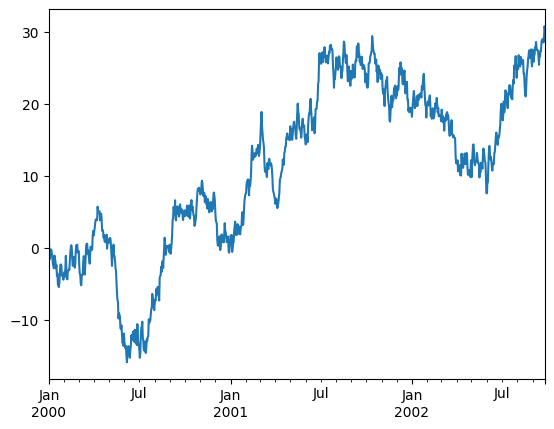

In [37]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

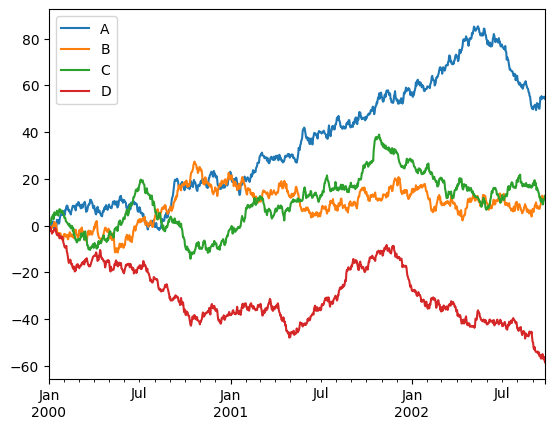

In [38]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

In [39]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.637045,-0.485201,0.644917,-1.584408
1,2000-01-02,-1.687228,-0.615375,0.512932,-0.164414
2,2000-01-03,-1.303834,-0.867836,0.435555,-2.229933
3,2000-01-04,-0.827530,-0.852819,1.313256,-0.836681
4,2000-01-05,-1.301541,-1.814182,1.660662,-2.146016
...,...,...,...,...,...
995,2002-09-22,54.701812,10.766638,9.014109,-56.302702
996,2002-09-23,54.925465,11.575670,10.546940,-57.183274
997,2002-09-24,55.138913,11.934725,10.901364,-57.379730
998,2002-09-25,55.163002,11.928982,11.226330,-56.309759


In [40]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.637045,-0.485201,0.644917,-1.584408
2000-01-02,-1.687228,-0.615375,0.512932,-0.164414
2000-01-03,-1.303834,-0.867836,0.435555,-2.229933
2000-01-04,-0.827530,-0.852819,1.313256,-0.836681
2000-01-05,-1.301541,-1.814182,1.660662,-2.146016
...,...,...,...,...
2002-09-22,54.701812,10.766638,9.014109,-56.302702
2002-09-23,54.925465,11.575670,10.546940,-57.183274
2002-09-24,55.138913,11.934725,10.901364,-57.379730
2002-09-25,55.163002,11.928982,11.226330,-56.309759


In [41]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.637045,-0.485201,0.644917,-1.584408
1,2000-01-02,-1.687228,-0.615375,0.512932,-0.164414
2,2000-01-03,-1.303834,-0.867836,0.435555,-2.229933
3,2000-01-04,-0.827530,-0.852819,1.313256,-0.836681
4,2000-01-05,-1.301541,-1.814182,1.660662,-2.146016
...,...,...,...,...,...
995,2002-09-22,54.701812,10.766638,9.014109,-56.302702
996,2002-09-23,54.925465,11.575670,10.546940,-57.183274
997,2002-09-24,55.138913,11.934725,10.901364,-57.379730
998,2002-09-25,55.163002,11.928982,11.226330,-56.309759


In [42]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.810147
b    0.497840
c    1.082326
d   -0.610103
e    1.075931
dtype: float64

In [43]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [44]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [45]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [46]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [47]:
s[0]

-0.8101473321448636

In [48]:
s[:3]

a   -0.810147
b    0.497840
c    1.082326
dtype: float64

In [49]:
s[s > s.median()]

c    1.082326
e    1.075931
dtype: float64

In [50]:
s[[4, 3, 1]]

e    1.075931
d   -0.610103
b    0.497840
dtype: float64

In [51]:
np.exp(s)

a    0.444793
b    1.645164
c    2.951536
d    0.543295
e    2.932722
dtype: float64

In [52]:
s.array

<PandasArray>
[-0.8101473321448636,  0.4978403118139756,  1.0823258070951585,
 -0.6101031014798926,  1.0759308806054746]
Length: 5, dtype: float64

In [53]:
s.to_numpy()

array([-0.81014733,  0.49784031,  1.08232581, -0.6101031 ,  1.07593088])

In [54]:
s["a"]

-0.8101473321448636

In [55]:
s["e"] = 12.0
s

a    -0.810147
b     0.497840
c     1.082326
d    -0.610103
e    12.000000
dtype: float64

In [56]:
np.exp(s)

a         0.444793
b         1.645164
c         2.951536
d         0.543295
e    162754.791419
dtype: float64

In [57]:
s[1:] + s[:-1]

a         NaN
b    0.995681
c    2.164652
d   -1.220206
e         NaN
dtype: float64

In [58]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -1.070449
1   -0.441514
2    2.497343
3    1.760332
4    0.364494
Name: something, dtype: float64

In [59]:
s2 = s.rename("different")
s2.name

'different'

In [60]:
d = {
"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
"two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [61]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [62]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [63]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [64]:
df.columns

Index(['one', 'two'], dtype='object')

In [65]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [66]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [67]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [68]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [69]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [70]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [71]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [72]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [ ]:
pd.DataFrame({

("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
("b", "b"): {("A", "D"): 9, ("A", "B"): 10}

})

In [73]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [74]:
Point3D = namedtuple("Point3D", "x y z")

In [75]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [76]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [77]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [78]:
pd.DataFrame.from_dict(
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
orient="index",
columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [79]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [80]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [81]:
del df["two"]
three = df.pop("three")
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [82]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [83]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [84]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [85]:
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [87]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


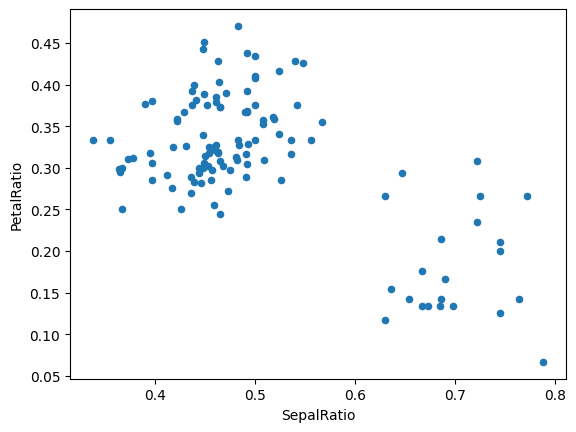

In [88]:
(iris.query("SepalLengthCm > 5").assign(
SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio"));

In [89]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [90]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,0.061591,-0.238241,-0.497645,NaN
1,0.943889,0.414136,2.884411,NaN
2,0.608069,-0.793168,0.341428,NaN
3,-1.070315,-1.683857,-2.575781,NaN
4,-1.102032,-0.540700,-1.139706,NaN
5,0.797848,-0.855161,3.310124,NaN
6,0.466484,0.920403,-1.766681,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [91]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [92]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [93]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [94]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [95]:
np.exp(df)

,A,B,C,D
0,1.491636,1.049881,1.249539,0.818109
1,1.244008,1.314341,0.449756,2.168173
2,1.313662,0.329138,3.318816,0.411672
3,0.231598,0.487686,0.139520,0.136891
4,0.838155,0.153421,0.809166,0.120942
5,0.512435,0.651256,12.130174,3.665270
6,1.453710,1.833222,0.485913,0.643091
7,0.167086,0.229423,2.174341,0.817247
8,5.443740,0.865871,0.217603,0.181385
9,0.962407,0.686851,0.686848,0.799187


In [96]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [97]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
ser1

a    1
b    2
c    3
dtype: int64

In [98]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

In [99]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [100]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

In [101]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.024066,0.625233,-0.797334,-2.196028,0.658795,-0.591189,-0.459252,1.142789,-1.724632,0.121350,0.478010,0.087380
1,0.014947,0.854306,-1.900589,-1.297291,0.534764,-0.338531,0.192659,0.948035,0.710735,0.144602,0.281176,0.244117
2,2.172618,1.065299,-0.458870,-0.678598,1.347630,0.979207,0.744002,-0.508363,-3.036614,2.393213,-0.117804,0.050677


In [102]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.525781,-0.490954,-0.571878,-1.415003,-0.103026,-0.880263,-0.931075,0.316101,-0.790218,-1.457342,-0.444556,-0.787344
1,-1.558793,-0.664028,-1.374341,1.191744,-0.522718,1.599344,-2.703661,-0.195616,0.864758,1.110100,-1.193981,1.132072
2,0.611220,1.352719,1.602718,-1.307783,-0.009658,0.455743,0.322867,0.696955,0.352374,-0.536705,1.357206,-0.321982


In [103]:
datafile = {
"filename": ["filename_01", "filename_02"],
"path": [
"media/user_name/storage/folder_01/filename_01",
"media/user_name/storage/folder_02/filename_02",]
}

pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [104]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [105]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,0.045341,0.997771
1,-1.636399,0.049277
2,-0.133038,0.329253
3,-0.810063,-0.208480
4,-0.662386,-0.714761


In [106]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [109]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

0   -0.007930
1   -0.027088
2    0.903603
3   -0.742506
4   -0.657215
dtype: float64

In [107]:
df[:2]

,A,B,C
2000-01-01,1.474651,-2.259637,-1.399789
2000-01-02,-0.598133,0.756673,-0.369297


In [108]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,1.474651,-2.259637,-1.399789
2000-01-02,-0.598133,0.756673,-0.369297
2000-01-03,-0.521255,-1.386793,0.389297
2000-01-04,-0.829949,0.279459,-0.276059
2000-01-05,1.137594,1.133778,-0.501815
2000-01-06,-0.425613,-1.041183,-1.332995
2000-01-07,-0.330397,-0.446006,1.140992
2000-01-08,0.682997,-1.311310,0.895697


In [110]:
s.array

<PandasArray>
[  -0.8333791059998383,
   -0.9433691326021276,
     0.596503211926192,
 -0.046772508830757405,
    0.9436381817959276]
Length: 5, dtype: float64

In [111]:
s.index.array

<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

In [112]:
s.to_numpy()

array([-0.83337911, -0.94336913,  0.59650321, -0.04677251,  0.94363818])

In [113]:
np.asarray(s)

array([-0.83337911, -0.94336913,  0.59650321, -0.04677251,  0.94363818])

In [114]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))
ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

In [115]:
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

In [116]:
df = pd.DataFrame({
"one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
"two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
"three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
})

df

,one,two,three
a,0.145990,0.02472,NaN
b,0.502700,-0.04950,1.105481
c,1.861733,-1.11462,-0.658016
d,NaN,-0.04834,0.049932


In [117]:
row = df.iloc[1]
column = df["two"]
df.sub(row, axis="columns")

,one,two,three
a,-0.356710,0.07422,NaN
b,0.000000,0.00000,0.000000
c,1.359032,-1.06512,-1.763496
d,NaN,0.00116,-1.055548


In [118]:
df.sub(row, axis=1)

,one,two,three
a,-0.356710,0.07422,NaN
b,0.000000,0.00000,0.000000
c,1.359032,-1.06512,-1.763496
d,NaN,0.00116,-1.055548


In [120]:
df.sub(column, axis="index")

,one,two,three
a,0.121270,0.0,NaN
b,0.552201,0.0,1.154981
c,2.976353,0.0,0.456604
d,NaN,0.0,0.098272


In [119]:
df.sub(column, axis=0)

,one,two,three
a,0.121270,0.0,NaN
b,0.552201,0.0,1.154981
c,2.976353,0.0,0.456604
d,NaN,0.0,0.098272


In [ ]:
dfmi = df.copy()
In [27]: dfmi.index = pd.MultiIndex.from_tuples(
[(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)

dfmi.sub(column, axis=0, level="second")

In [121]:
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [122]:
div, rem = divmod(df,3)
div

,one,two,three
a,0.0,0.0,NaN
b,0.0,-1.0,0.0
c,0.0,-1.0,-1.0
d,NaN,-1.0,0.0


In [123]:
idx = pd.Index(np.arange(10))
idx

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [124]:
div, rem = divmod(idx, 3)
div

Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')

In [125]:
df.gt(df)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [126]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [127]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

In [128]:
(df > 0).any().any()

True

In [129]:
pd.DataFrame(columns=list("ABC")).empty

True

In [130]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [131]:
(df + df).equals(df * 2)

True

In [132]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])
df1.equals(df2)

False

In [133]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [134]:
pd.Index(["foo", "bar", "baz"]) == "foo"

array([ True, False, False])

In [135]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [136]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [137]:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

In [138]:
df1 = pd.DataFrame(
{"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame({
"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
"B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
})

df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [139]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [140]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)
df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [141]:
df.sum(0, skipna=False)

one          NaN
two     -1.18774
three        NaN
dtype: float64

In [142]:
df.sum(axis=1, skipna=True)

a    0.170710
b    1.558681
c    0.089097
d    0.001592
dtype: float64

In [143]:
ts_stand = (df - df.mean()) / df.std()
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [144]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

In [145]:
np.mean(df["one"])

0.8368077758681136

In [146]:
np.mean(df["one"].to_numpy())

nan

In [147]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

11

In [148]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan
series.describe()

count    500.000000
mean      -0.012649
std        1.032007
min       -3.197787
25%       -0.719624
50%       -0.039027
75%        0.691326
max        2.880873
dtype: float64

In [149]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame.iloc[::2] = np.nan
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.005626,-0.105809,0.009873,-0.003143,-0.027055
std,0.969985,0.986127,1.022017,1.020173,0.972380
min,-2.807602,-3.222340,-3.729939,-3.068390,-3.005601
25%,-0.687479,-0.797703,-0.690159,-0.675931,-0.704974
50%,0.026494,-0.109706,0.045499,0.008745,-0.100165
75%,0.670930,0.578741,0.704682,0.679371,0.623342
max,2.699146,3.148230,3.218452,2.903025,3.229809


In [150]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean      -0.012649
std        1.032007
min       -3.197787
5%        -1.676382
25%       -0.719624
50%       -0.039027
75%        0.691326
95%        1.785378
max        2.880873
dtype: float64

In [151]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object